In [441]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance
import seaborn as sb
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from seaborn import lmplot
from sklearn import linear_model
from scipy.stats import norm
%matplotlib inline
import random

In [8]:
dataframe = pd.read_excel('C:/Users/elkin/Downloads/nbaaaa.xlsx', sep=';')
dataframe.head(307)

,G,GS,MPG,FG%,3p%,FT%,OFF,DEF,RPG,APG,SPG,BPG,TO,PF,PPG,Class
0,362,223,24.4,0.466,0.405,0.800,0.6,2.1,2.7,1.5,0.5,0.3,0.8,2.0,8.8,1
1,19,0,11.9,0.273,0.298,0.970,0.1,1.1,1.2,1.2,0.4,0.0,1.2,1.4,4.6,1
2,1148,1140,36.9,0.452,0.400,0.894,1.0,3.2,4.2,3.6,1.2,0.2,2.2,2.3,20.0,1
3,466,170,19.8,0.482,0.284,0.745,0.9,1.9,2.8,1.3,1.2,0.4,1.4,2.2,7.8,1
4,38,1,9.5,0.381,0.292,0.743,0.3,0.9,1.2,0.3,0.3,0.1,0.5,1.1,3.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,1088,912,29.5,0.474,0.137,0.414,3.2,6.5,9.6,1.3,1.3,2.0,1.0,1.9,5.7,2
303,14,0,12.0,0.414,0.000,0.478,0.9,1.9,2.8,0.2,0.5,0.4,1.1,1.6,2.5,2
304,19,0,5.8,0.444,0.000,0.417,0.8,1.2,2.1,0.0,0.2,0.8,0.3,0.7,1.5,2
305,43,5,14.7,0.507,0.000,0.652,1.5,2.1,3.6,0.3,0.5,0.4,0.5,1.4,4.6,2


In [9]:
dataframe.shape

(307, 16)

**CAMPOS**

**G:** Juegos en los que participó

**GS:** Juegos en los que inicia de titular

**MPG:** Minutos por partido

**FG%:** Porcentaje de acierto de tiro

**3P%:** Porcentaje de tiro de tres puntos

**FT%:** Porcentaje de tiros libres

**OFF:** Rebotes ofensivos

**DEF:** Rebotes defensivos por juego

**RPG:** Rebotes(totales) por juego

**APG:** Asistencias por partido

**SPG:** Robos por juego

**BPG:** Bloqueos por juego

**TO:** Pérdidas de balón por partido

**PF:** Faltas por partido

**PPG:** Puntos por partido


**Class Tipo de jugador:**

1: perimetral (Guard,Guard-Forward ó Forward-Guard)

2: internos (Forward, Forward-Center, Center ó Center-Forward)

In [10]:
dataframe.dtypes

G          int64
GS         int64
MPG      float64
FG%      float64
3p%      float64
FT%      float64
OFF      float64
DEF      float64
RPG      float64
APG      float64
SPG      float64
BPG      float64
TO       float64
PF       float64
PPG      float64
Class      int64
dtype: object

In [419]:
dataframe.describe()

,G,GS,MPG,FG%,3p%,FT%,OFF,DEF,RPG,APG,SPG,BPG,TO,PF,PPG,Class
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,342.846906,194.791531,21.962541,0.449893,3.500388,7.236961,1.014332,2.600651,3.617264,2.128664,0.707492,0.453746,1.347557,1.964169,8.771661,1.358306
std,286.125137,247.236204,8.155354,0.058465,57.059296,80.522956,0.804597,1.490997,2.202819,1.916601,0.408779,0.479730,0.717261,0.677765,4.834261,0.480286
min,2.000000,0.000000,4.500000,0.267000,0.000000,0.000000,0.100000,0.300000,0.500000,0.000000,0.000000,0.000000,0.000000,0.400000,1.400000,1.000000
25%,92.500000,17.500000,15.750000,0.415500,0.111000,0.673000,0.400000,1.600000,2.150000,0.800000,0.400000,0.100000,0.800000,1.500000,5.200000,1.000000
50%,282.000000,100.000000,21.700000,0.444000,0.313000,0.762000,0.700000,2.300000,3.100000,1.500000,0.600000,0.300000,1.100000,2.000000,8.000000,1.000000
75%,527.500000,284.000000,28.000000,0.482000,0.366000,0.807000,1.400000,3.200000,4.400000,2.950000,0.900000,0.600000,1.700000,2.500000,11.800000,2.000000
max,1315.000000,1302.000000,37.700000,0.644000,1000.000000,1000.000000,3.900000,9.300000,13.000000,9.800000,2.400000,2.400000,3.800000,4.100000,25.400000,2.000000


In [64]:
features=list(dataframe.columns[1:16])

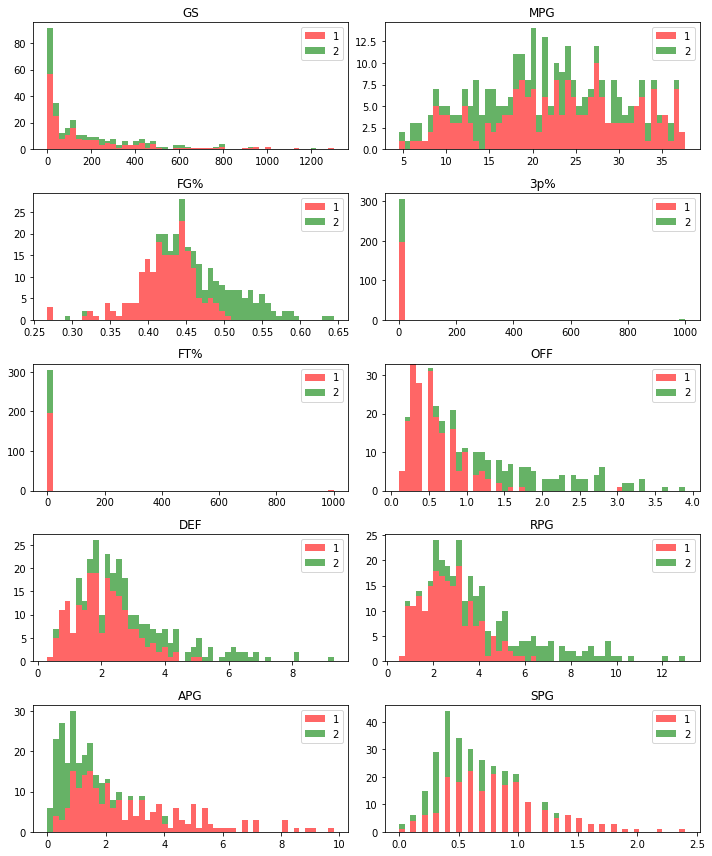

In [65]:

mask = dataframe['Class'] == 1
dataframe_M = dataframe[mask]
dataframe_B = dataframe[~mask]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,12))
axes = axes.ravel()
fig.set_facecolor('w')
for idx,ax in enumerate(axes):
  ax.hist([dataframe_M[features[idx]],dataframe_B[features[idx]]], bins=50, alpha=0.6, stacked=True, label=['1','2'],color=['r','g'])
  ax.legend(loc='upper right')
  ax.set_title(features[idx])
plt.tight_layout()
plt.show()





**CORRELACION**

<function matplotlib.pyplot.show(*args, **kw)>

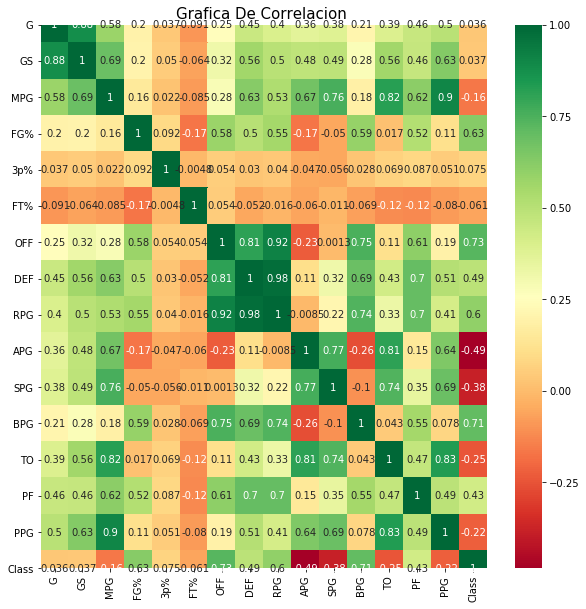

In [66]:
sns.heatmap(dataframe.corr(),annot=True,cmap='RdYlGn') 
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Grafica De Correlacion ', y=1.05, size=15)
plt.show

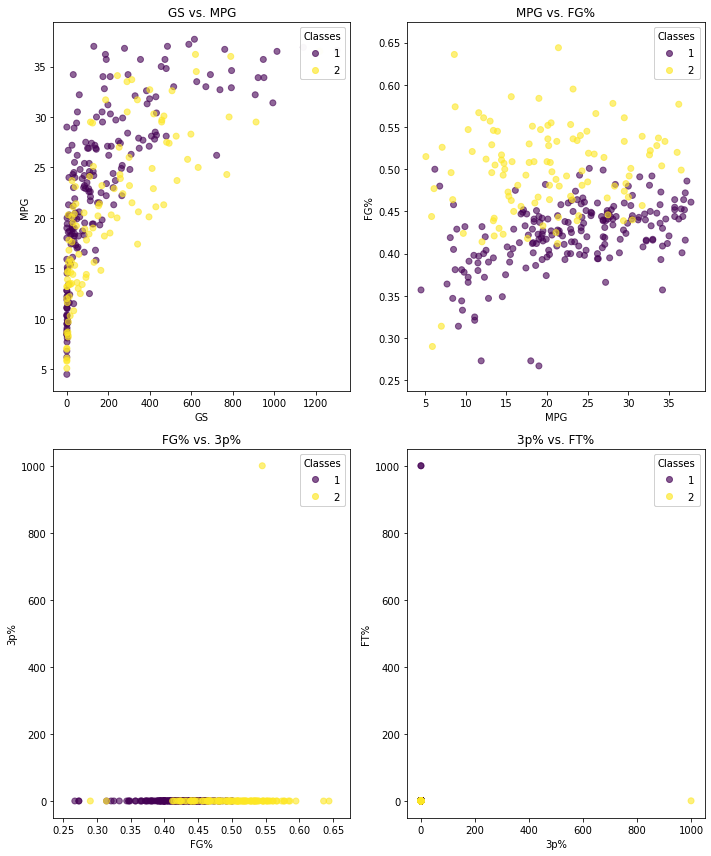

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,12))
axes = axes.ravel()
fig.set_facecolor('w')
for idx,ax in enumerate(axes):
  scatter = ax.scatter(dataframe[features[idx]], dataframe[features[idx+1]], c=dataframe['Class'], alpha=0.6, label=['Color 1', 'Color 2'])
  ax.set_xlabel(features[idx])
  ax.set_ylabel(features[idx+1])
  legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
  ax.add_artist(legend1)
  ax.set_title(features[idx]+' vs. '+features[idx+1])
plt.tight_layout()
plt.show()

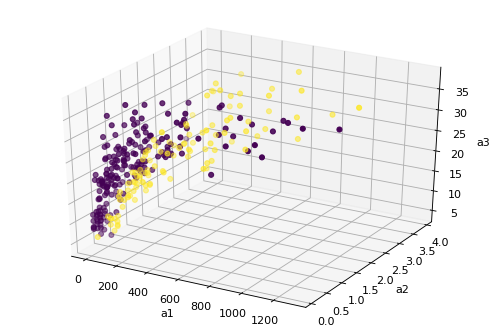

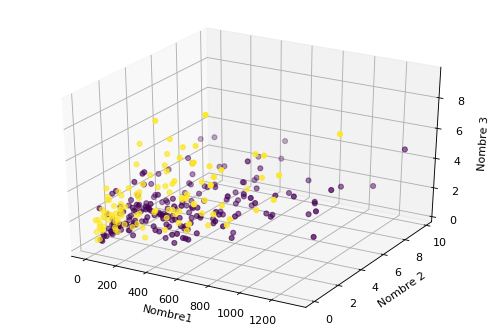

In [27]:
fig = plt.figure(num=None, dpi=80, facecolor='w',edgecolor='k')
ax = Axes3D(fig)
ax.scatter3D(dataframe['GS'],dataframe['OFF'],dataframe['MPG'], c=dataframe.Class)
xLabel = ax.set_xlabel('a1', linespacing=3.2)
yLabel = ax.set_ylabel('a2', linespacing=3.1)
zLabel = ax.set_zlabel('a3',linespacing=3.4)

fig = plt.figure(num=None, dpi=80, facecolor='w',edgecolor='k')
ax = Axes3D(fig)
ax.scatter3D(dataframe['G'],dataframe['APG'],dataframe['DEF'], c=dataframe.Class)
xLabel = ax.set_xlabel('Nombre1', linespacing=3.2)
yLabel = ax.set_ylabel('Nombre 2', linespacing=3.1)
zLabel = ax.set_zlabel('Nombre 3',linespacing=3.4)

In [262]:
dataframe.isnull().any()

G        False
GS       False
MPG      False
FG%      False
3p%      False
FT%      False
OFF      False
DEF      False
RPG      False
APG      False
SPG      False
BPG      False
TO       False
PF       False
PPG      False
Class    False
dtype: bool

In [471]:
X = dataframe[['G', 'GS', 'MPG', 'FG%', '3p%', 'FT%', 'OFF', 'DEF', 'RPG', 'APG','SPG','BPG','TO','PF','PPG']].values
y = dataframe['Class'].values

In [472]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [473]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [474]:
print('Coefficients: \n', regressor.coef_)
print('Independent term: \n', regressor.intercept_)

import statsmodels.api as sm
x = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit() 
model.summary() 

Coefficients: 
 [-3.43133523e-05  8.70529054e-05 -2.16085037e-02  5.27259077e-01
 -9.37311606e-01 -3.02525115e-04 -1.19891583e-01 -1.47038823e-01
  2.39960602e-01  3.78135977e-02 -2.49583898e-01  7.61689566e-02
 -1.09357794e-01  2.13448950e-01  5.53257068e-03]
Independent term: 
 1.1968372769587439


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              654.9
Date:                Mon, 26 Oct 2020   Prob (F-statistic):                   3.00e-179
Time:                        18:05:26   Log-Likelihood:                          26.277
No. Observations:                 245   AIC:                                     -22.55
Df Residuals:                     230   BIC:                                      29.96
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -7.323e-05      0.000     -0.558      0.577      -0.000       0.000
x2          7.264e-05      0.000      0.426      0.671      -0.000       0.000
x3            -0.0110      0.007     -1.655      0.099      -0.024       0.002
x4             2.9702      0.144     20.620      0.000       2.686       3.254
x5            -0.4802      0.154     -3.117      0.002      -0.784      -0.177
x6          2.214e-06      0.000      0.013      0.990      -0.000       0.000
x7            -0.0703      0.291     -0.241      0.810      -0.644       0.504
x8            -0.1238      0.297     -0.417      0.677      -0.708       0.461
x9             0.1954      0.293      0.668      0.505      -0.381       0.772
x10            0.0052      0.019      0.270      0.787      -0.033       0.043
x11           -0.2301      0.067     -3.447      0.001      -0.362      -0.099
x12            0.0192      0.055      0.348      0.728      -0.090       0.128
x13            0.0232      0.057      0.408      0.684      -0.089       0.135
x14            0.1700      0.042      4.032      0.000       0.087       0.253
x15           -0.0175      0.009     -2.056      0.041      -0.034      -0.001
==============================================================================
Omnibus:                       77.048   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.581
Skew:                           1.324   Prob(JB):                     1.05e-54
Kurtosis:                       7.164   Cond. No.                     1.88e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [449]:
dataframe['REBOTES']=(dataframe['OFF']+dataframe['DEF']+dataframe['RPG'])
dataframe.drop(['OFF','DEF','RPG'], axis=1).head(10)

,G,GS,MPG,FG%,3p%,FT%,APG,SPG,BPG,TO,PF,PPG,Class,REBOTES
0,362,223,24.4,0.466,0.405,0.800,1.5,0.5,0.3,0.8,2.0,8.8,1,5.4
1,19,0,11.9,0.273,0.298,0.970,1.2,0.4,0.0,1.2,1.4,4.6,1,2.4
2,1148,1140,36.9,0.452,0.400,0.894,3.6,1.2,0.2,2.2,2.3,20.0,1,8.4
3,466,170,19.8,0.482,0.284,0.745,1.3,1.2,0.4,1.4,2.2,7.8,1,5.6
4,38,1,9.5,0.381,0.292,0.743,0.3,0.3,0.1,0.5,1.1,3.1,1,2.4
5,70,19,18.3,0.413,0.381,0.827,1.1,0.3,0.1,1.1,1.7,6.7,1,3.8
6,77,4,11.5,0.380,0.325,0.757,0.8,0.1,0.1,0.6,0.8,3.7,1,2.6
7,552,455,35.0,0.421,0.351,0.803,5.3,1.6,0.2,3.2,3.0,20.7,1,7.8
8,282,142,26.8,0.407,0.374,0.876,4.4,0.6,0.0,1.6,1.7,10.9,1,4.0
9,208,84,24.2,0.459,0.409,0.770,1.1,0.6,0.5,1.0,2.0,10.5,1,8.0


In [450]:
reduced = dataframe.drop(['OFF','DEF','RPG'], axis=1)
reduced.describe()

,G,GS,MPG,FG%,3p%,FT%,APG,SPG,BPG,TO,PF,PPG,Class,REBOTES
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,342.846906,194.791531,21.962541,0.449893,3.500388,7.236961,2.128664,0.707492,0.453746,1.347557,1.964169,8.771661,1.358306,7.232248
std,286.125137,247.236204,8.155354,0.058465,57.059296,80.522956,1.916601,0.408779,0.479730,0.717261,0.677765,4.834261,0.480286,4.398370
min,2.000000,0.000000,4.500000,0.267000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,1.400000,1.000000,1.100000
25%,92.500000,17.500000,15.750000,0.415500,0.111000,0.673000,0.800000,0.400000,0.100000,0.800000,1.500000,5.200000,1.000000,4.250000
50%,282.000000,100.000000,21.700000,0.444000,0.313000,0.762000,1.500000,0.600000,0.300000,1.100000,2.000000,8.000000,1.000000,6.200000
75%,527.500000,284.000000,28.000000,0.482000,0.366000,0.807000,2.950000,0.900000,0.600000,1.700000,2.500000,11.800000,2.000000,8.800000
max,1315.000000,1302.000000,37.700000,0.644000,1000.000000,1000.000000,9.800000,2.400000,2.400000,3.800000,4.100000,25.400000,2.000000,25.900000


In [451]:
dataframe['PORCENTAJES']=dataframe['FG%']+dataframe['3p%']+dataframe['FT%']
dataframe.drop(['FG%','3p%','FT%'], axis=1).head(10)

,G,GS,MPG,OFF,DEF,RPG,APG,SPG,BPG,TO,PF,PPG,Class,REBOTES,PORCENTAJES
0,362,223,24.4,0.6,2.1,2.7,1.5,0.5,0.3,0.8,2.0,8.8,1,5.4,1.671
1,19,0,11.9,0.1,1.1,1.2,1.2,0.4,0.0,1.2,1.4,4.6,1,2.4,1.541
2,1148,1140,36.9,1.0,3.2,4.2,3.6,1.2,0.2,2.2,2.3,20.0,1,8.4,1.746
3,466,170,19.8,0.9,1.9,2.8,1.3,1.2,0.4,1.4,2.2,7.8,1,5.6,1.511
4,38,1,9.5,0.3,0.9,1.2,0.3,0.3,0.1,0.5,1.1,3.1,1,2.4,1.416
5,70,19,18.3,0.6,1.3,1.9,1.1,0.3,0.1,1.1,1.7,6.7,1,3.8,1.621
6,77,4,11.5,0.2,1.1,1.3,0.8,0.1,0.1,0.6,0.8,3.7,1,2.6,1.462
7,552,455,35.0,0.8,3.1,3.9,5.3,1.6,0.2,3.2,3.0,20.7,1,7.8,1.575
8,282,142,26.8,0.3,1.7,2.0,4.4,0.6,0.0,1.6,1.7,10.9,1,4.0,1.657
9,208,84,24.2,1.2,2.8,4.0,1.1,0.6,0.5,1.0,2.0,10.5,1,8.0,1.638


In [452]:

reduced1 = dataframe.drop(['FG%','3p%','FT%'], axis=1)
reduced1.describe()

,G,GS,MPG,OFF,DEF,RPG,APG,SPG,BPG,TO,PF,PPG,Class,REBOTES,PORCENTAJES
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,342.846906,194.791531,21.962541,1.014332,2.600651,3.617264,2.128664,0.707492,0.453746,1.347557,1.964169,8.771661,1.358306,7.232248,11.187241
std,286.125137,247.236204,8.155354,0.804597,1.490997,2.202819,1.916601,0.408779,0.479730,0.717261,0.677765,4.834261,0.480286,4.398370,98.462854
min,2.000000,0.000000,4.500000,0.100000,0.300000,0.500000,0.000000,0.000000,0.000000,0.000000,0.400000,1.400000,1.000000,1.100000,0.444000
25%,92.500000,17.500000,15.750000,0.400000,1.600000,2.150000,0.800000,0.400000,0.100000,0.800000,1.500000,5.200000,1.000000,4.250000,1.244500
50%,282.000000,100.000000,21.700000,0.700000,2.300000,3.100000,1.500000,0.600000,0.300000,1.100000,2.000000,8.000000,1.000000,6.200000,1.489000
75%,527.500000,284.000000,28.000000,1.400000,3.200000,4.400000,2.950000,0.900000,0.600000,1.700000,2.500000,11.800000,2.000000,8.800000,1.605000
max,1315.000000,1302.000000,37.700000,3.900000,9.300000,13.000000,9.800000,2.400000,2.400000,3.800000,4.100000,25.400000,2.000000,25.900000,1001.188000


In [453]:
dataframe.head(10)

,G,GS,MPG,FG%,3p%,FT%,OFF,DEF,RPG,APG,SPG,BPG,TO,PF,PPG,Class,REBOTES,PORCENTAJES
0,362,223,24.4,0.466,0.405,0.800,0.6,2.1,2.7,1.5,0.5,0.3,0.8,2.0,8.8,1,5.4,1.671
1,19,0,11.9,0.273,0.298,0.970,0.1,1.1,1.2,1.2,0.4,0.0,1.2,1.4,4.6,1,2.4,1.541
2,1148,1140,36.9,0.452,0.400,0.894,1.0,3.2,4.2,3.6,1.2,0.2,2.2,2.3,20.0,1,8.4,1.746
3,466,170,19.8,0.482,0.284,0.745,0.9,1.9,2.8,1.3,1.2,0.4,1.4,2.2,7.8,1,5.6,1.511
4,38,1,9.5,0.381,0.292,0.743,0.3,0.9,1.2,0.3,0.3,0.1,0.5,1.1,3.1,1,2.4,1.416
5,70,19,18.3,0.413,0.381,0.827,0.6,1.3,1.9,1.1,0.3,0.1,1.1,1.7,6.7,1,3.8,1.621
6,77,4,11.5,0.380,0.325,0.757,0.2,1.1,1.3,0.8,0.1,0.1,0.6,0.8,3.7,1,2.6,1.462
7,552,455,35.0,0.421,0.351,0.803,0.8,3.1,3.9,5.3,1.6,0.2,3.2,3.0,20.7,1,7.8,1.575
8,282,142,26.8,0.407,0.374,0.876,0.3,1.7,2.0,4.4,0.6,0.0,1.6,1.7,10.9,1,4.0,1.657
9,208,84,24.2,0.459,0.409,0.770,1.2,2.8,4.0,1.1,0.6,0.5,1.0,2.0,10.5,1,8.0,1.638


In [454]:
X = dataframe[['G', 'GS', 'MPG','APG','SPG','BPG','TO','PF','PPG','REBOTES','PORCENTAJES']].values
y = dataframe['Class'].values

In [455]:
X=reduced.drop(['Class'], axis=1)
y=reduced['Class']
 
best=SelectKBest(k=7)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['FG%', 'APG', 'SPG', 'BPG', 'TO', 'PF', 'REBOTES'], dtype='object')


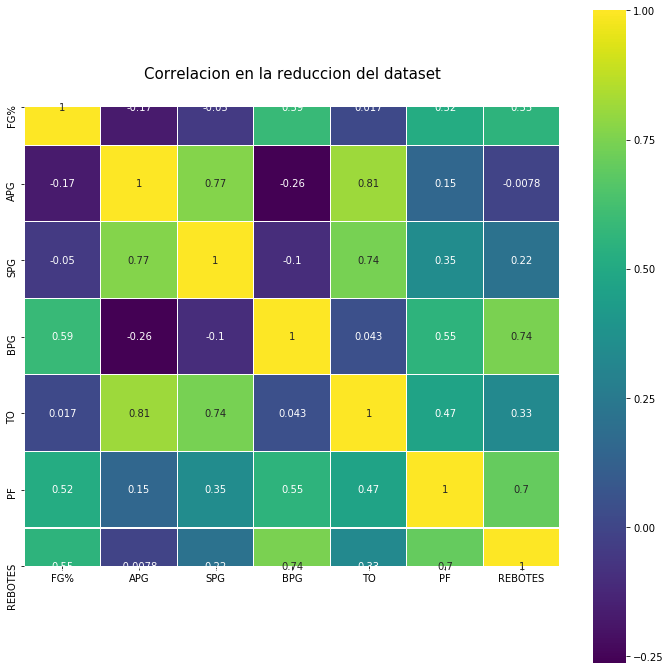

In [388]:
used_features =X.columns[selected]
 
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlacion en la reduccion del dataset', y=1.05, size=15)
sb.heatmap(dataframe[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

C:\Users\Juan Almenares\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Juan Almenares\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Juan Almenares\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Juan Almenares\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


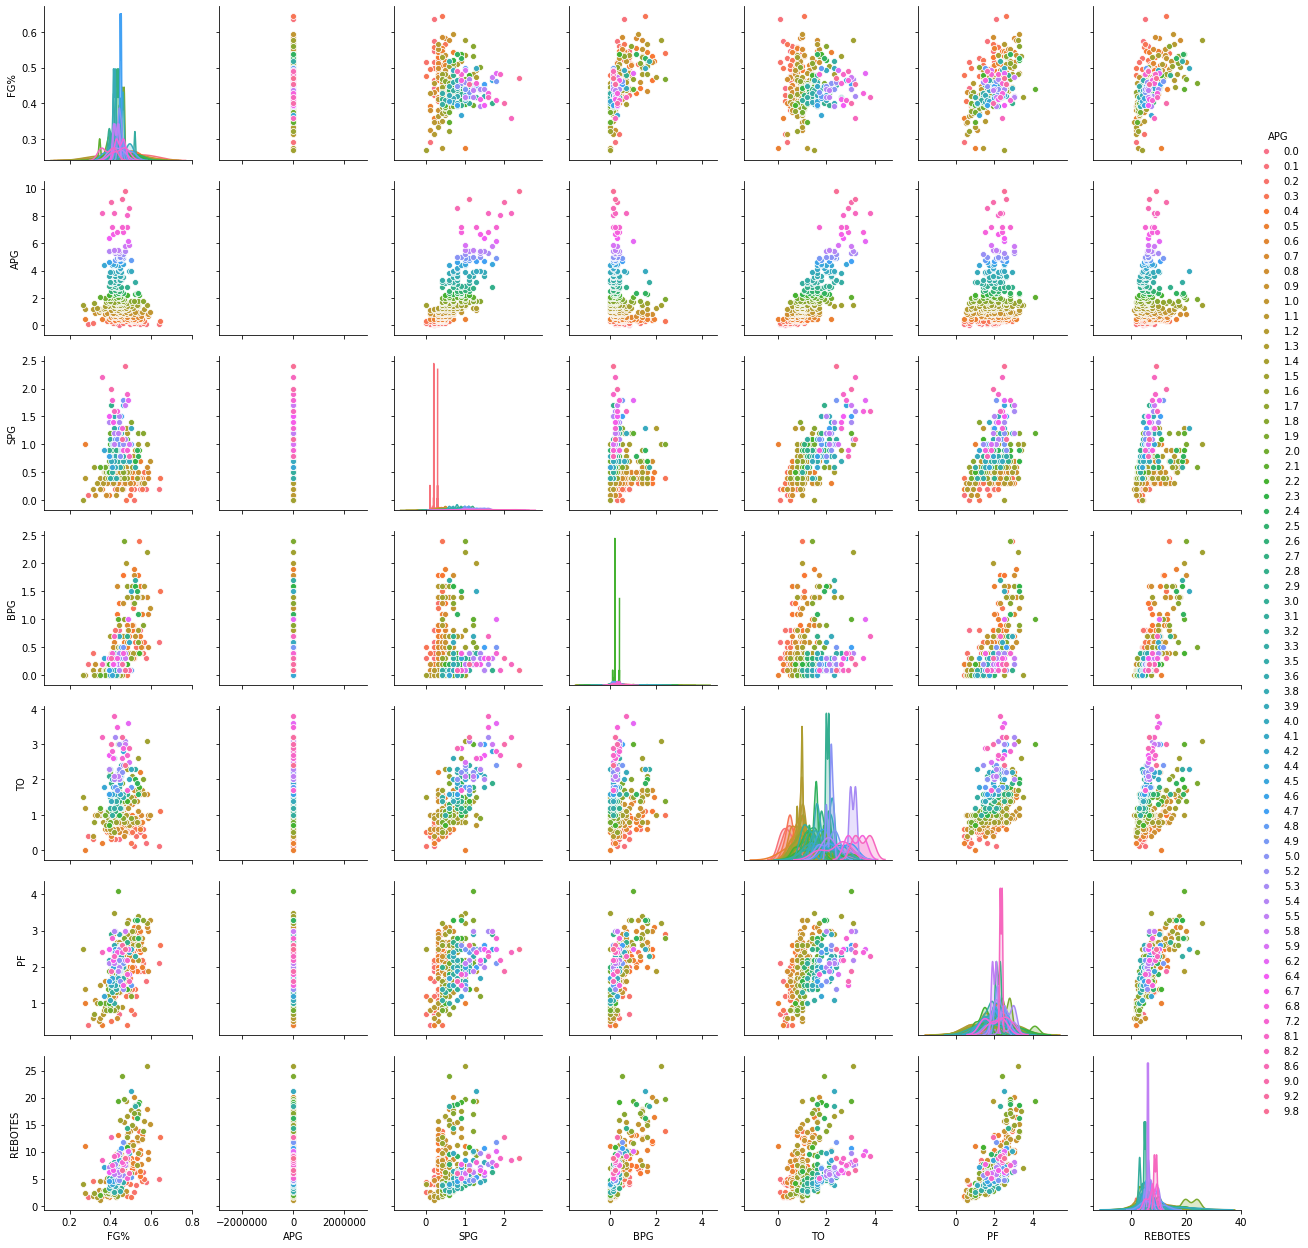

In [367]:
sb.pairplot(dataframe[used_features], hue='APG')

In [456]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [457]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [438]:
print('Coefficients: \n', regressor.coef_)
print('Independent term: \n', regressor.intercept_)

import statsmodels.api as sm
x = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit() 
model.summary() 

Coefficients: 
 [-3.59042028e-05  8.67075479e-05 -2.27099169e-02  5.31228158e-01
 -9.58020612e-01 -2.87641017e-04  3.63685582e-02 -2.41681427e-01
  7.54797747e-02 -1.09645588e-01  2.18749467e-01  6.35605056e-03
  5.13421805e-02]
Independent term: 
 1.1978414278567433


C:\Users\Juan Almenares\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Class   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              759.6
Date:                Mon, 26 Oct 2020   Prob (F-statistic):                   5.85e-182
Time:                        17:53:15   Log-Likelihood:                          25.857
No. Observations:                 245   AIC:                                     -25.71
Df Residuals:                     232   BIC:                                      19.80
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
G          -7.165e-05      0.000     -0.549      0.584      -0.000       0.000
GS          6.892e-05      0.000      0.406      0.685      -0.000       0.000
MPG           -0.0124      0.006     -1.929      0.055      -0.025       0.000
FG%            2.9896      0.140     21.338      0.000       2.714       3.266
3p%           -0.5199      0.145     -3.583      0.000      -0.806      -0.234
FT%         3.273e-05      0.000      0.201      0.841      -0.000       0.000
APG            0.0030      0.019      0.158      0.874      -0.034       0.040
SPG           -0.2220      0.066     -3.380      0.001      -0.351      -0.093
BPG            0.0182      0.055      0.331      0.741      -0.090       0.127
TO             0.0228      0.057      0.403      0.688      -0.089       0.135
PF             0.1746      0.041      4.225      0.000       0.093       0.256
PPG           -0.0165      0.008     -1.962      0.051      -0.033     6.8e-05
REBOTES        0.0452      0.007      6.581      0.000       0.032       0.059
==============================================================================
Omnibus:                       77.601   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.108
Skew:                           1.321   Prob(JB):                     8.96e-57
Kurtosis:                       7.278   Cond. No.                     6.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

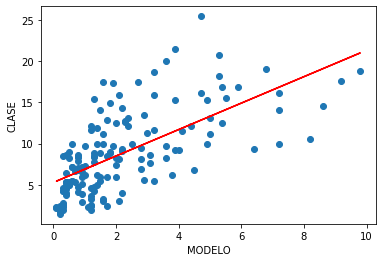

<Figure size 864x864 with 0 Axes>

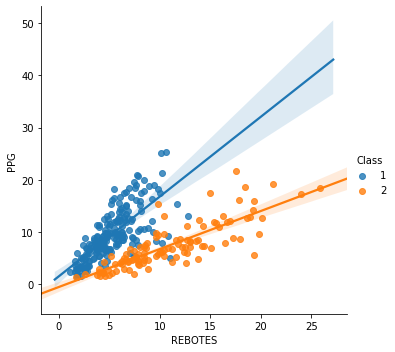

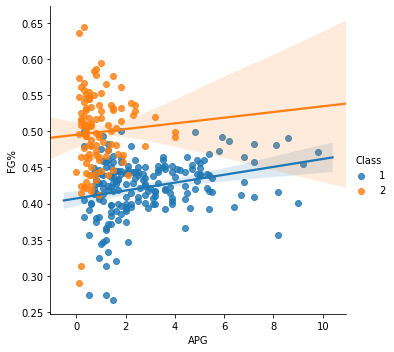

In [459]:
X = dataframe['APG'].values.reshape(-1,1)
y = dataframe['PPG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
lr = regressor = LinearRegression() 
lr.fit(X_test, y_test)
y_pred = lr.predict(X_test)


plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('MODELO')
plt.ylabel('CLASE')
plt.show()


plt.figure(figsize=(12, 12))
lmplot(x="REBOTES", y="PPG", hue="Class", data=dataframe)
lmplot(x="APG", y="FG%", hue="Class", data=dataframe)

In [475]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,1,1.116262
1,2,0.771212
2,2,1.023981
3,1,1.746406
4,1,1.797198
...,...,...
57,1,1.921105
58,1,1.965504
59,1,1.204974
60,1,0.966908


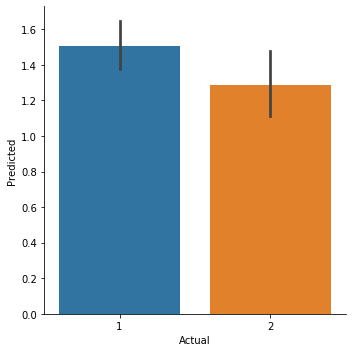

In [500]:
sns.catplot(x = "Actual", y = "Predicted", kind = "bar", data = df); 

In [490]:

print('Error absoluto medio:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Error medio cuadrado:', metrics.mean_squared_error(y_test, y_pred)) 
print('Error cuadrático medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error absoluto medio: 0.6063671725957613
Error medio cuadrado: 0.5531072563591922
Error cuadrático medio: 0.743711810017289


In [462]:
X_train, X_test = train_test_split(dataframe, test_size=0.2, random_state=6) 
y_train =X_train["Class"]
y_test = X_test["Class"]

In [463]:
gnb = LinearRegression()
gnb.fit(
    X_train[used_features].values,
    y_train
)
y_pred = gnb.predict(X_test[used_features])
 
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Precisión en el set de Entrenamiento: 0.73
Precisión en el set de Test: 0.78


**REGRESION LOGISTICA**

In [11]:
print('Información en el dataset:')
print(dataframe.keys())

Información en el dataset:
Index(['G', 'GS', 'MPG', 'FG%', '3p%', 'FT%', 'OFF', 'DEF', 'RPG', 'APG',
       'SPG', 'BPG', 'TO', 'PF', 'PPG', 'Class'],
      dtype='object')
